# Sentiment Analysis of Flipkart Product Reviews

### Step 1: Exploratory Data Analysis (EDA) & Preprocessing

### Objective
The objective of this step is to explore the Flipkart product review dataset, understand its structure, and preprocess the textual data to make it suitable for sentiment analysis.


### 1. Import Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Observation:
The necessary libraries for data manipulation, visualization, and natural language processing
were successfully imported. NLTK resources were downloaded for text preprocessing tasks.


### 2. Load the Dataset

In [6]:
df = pd.read_csv("flipkart_reviews.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


### Observation:
The dataset was successfully loaded and contains customer reviews collected from the Flipkart platform.


### 3. Check Dataset Shape

In [7]:
df.shape

(8518, 8)

### Observation:
The dataset contains 8,518 rows, where each row represents an individual customer review.


### 4. Check Column Names

In [11]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

### 5. Check Data Types & Basic Info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


### Observation:
- The dataset consists of a mix of categorical and numerical features.
- Review text is stored as object type, while ratings and vote counts are numerical.
- The **Month** column is stored as an object (string) data type instead of a datetime format.
This indicates that the month information is represented as text and may require conversion
if temporal analysis is needed.


In [13]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

### Observation:
The Month column was converted from object type to datetime format.
Invalid or missing values were handled gracefully using coercion.
This conversion enables time-based analysis if required.


### 6. Check Missing Values

In [15]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

### Observation:
- Some records contain missing values in the review text or ratings columns.
- These missing values need to be handled before further analysis.


### 7. Handle Missing Values

In [16]:
df.dropna(subset=['Review text', 'Ratings'], inplace=True)

### Observation:
Rows with missing review text or ratings were removed to ensure reliable sentiment labeling
and accurate text preprocessing.


### 8. Check Duplicate Records

In [17]:
df.duplicated().sum()

np.int64(0)

### Observation:
Duplicate records were checked to ensure that repeated reviews do not bias the analysis.


### 9. Remove Duplicates (If Any)

In [18]:
df.drop_duplicates(inplace=True)

### Observation:
Duplicate records, if present, were removed to maintain data integrity.


### 10. Create Sentiment Labels

In [19]:
df = df[df['Ratings'] != 3]

df['sentiment'] = df['Ratings'].apply(
    lambda x: 1 if x >= 4 else 0
)

df['sentiment'].value_counts()

sentiment
1    6823
0    1072
Name: count, dtype: int64

### Observation:
- Customer ratings were converted into binary sentiment labels.
Ratings greater than or equal to 4 were classified as positive,
- while ratings less than or equal to 2 were classified as negative.
- Neutral reviews (rating = 3) were excluded.


### 11. Visualize Sentiment Distribution

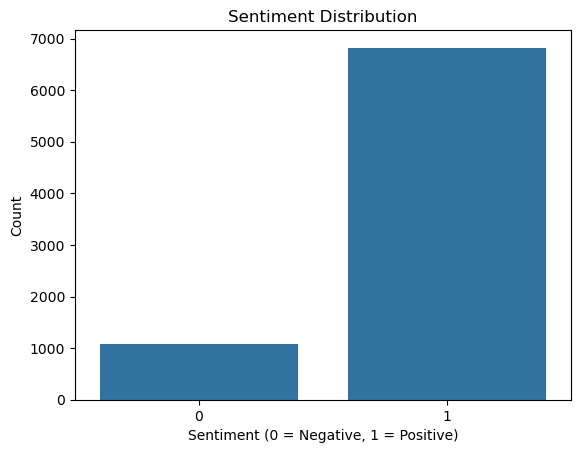

In [20]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

### Observation:
The visualization shows that positive reviews are more frequent than negative reviews,
indicating a slight class imbalance in the dataset.


### 12. Text Cleaning & Normalization

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['Review text'].apply(clean_text)
df[['Review text', 'clean_review']].head()

,Review text,clean_review
0,"Nice product, good quality, but price is now r...",nice product good quality price rising bad sig...
1,They didn't supplied Yonex Mavis 350. Outside ...,didnt supplied yonex mavis outside cover yonex...
2,Worst product. Damaged shuttlecocks packed in ...,worst product damaged shuttlecock packed new b...
4,Over pricedJust â?¹620 ..from retailer.I didn'...,pricedjust retaileri didnt understand wat adva...
5,Good quality product. Delivered on time.READ MORE,good quality product delivered timeread


### Observation:
- Text preprocessing involved lowercasing, removal of punctuation and special characters,
stopword removal, and lemmatization. 
- This step helped normalize the review text
and reduce noise in the data.


### 13. Review Length Analysis

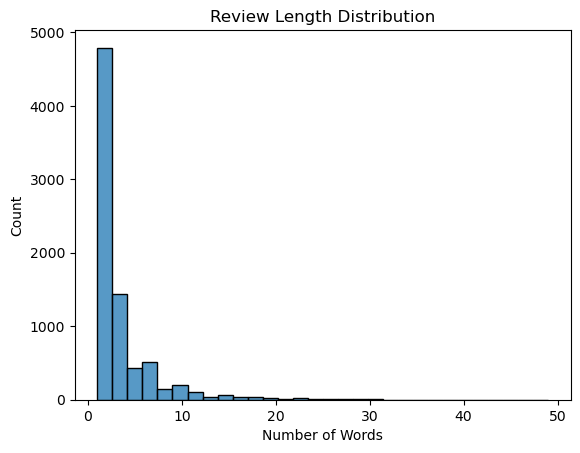

In [22]:
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

sns.histplot(df['review_length'], bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.show()

### Observation:
Most customer reviews are short to medium in length,
which makes them suitable for TF-IDF based feature extraction techniques.


### 14. Negative Review Word Analysis

In [23]:
from collections import Counter

negative_words = ' '.join(
    df[df['sentiment'] == 0]['clean_review']
).split()

Counter(negative_words).most_common(15)

[('shuttle', 300),
 ('quality', 254),
 ('product', 214),
 ('bad', 178),
 ('qualityread', 122),
 ('good', 117),
 ('worst', 102),
 ('poor', 89),
 ('goodread', 88),
 ('productread', 79),
 ('one', 72),
 ('dont', 71),
 ('buy', 63),
 ('day', 59),
 ('box', 55)]

### Observation:
Frequently occurring words in negative reviews highlight key customer pain points
such as product quality, durability, packaging, and pricing concerns.


### 15. Save Cleaned Dataset

In [24]:
df.to_csv("cleaned_flipkart_reviews.csv", index=False)

### Observation:
- The dataset has been successfully explored and preprocessed.
- The cleaned data is now ready for feature extraction and machine learning model training.
